QR code scanner

In [ ]:
import cv2
import qrcode

In [2]:
import cv2

# Scan QR code from camera
def qr_code_scanner():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Unable to open camera")
        return
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Frame capture failed")
            break
        
        # Convert image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect QR code
        detector = cv2.QRCodeDetector()
        data, points, _ = detector.detectAndDecode(gray)
        
        if points is not None:
            # Draw bounding box around the QR code
            points = points[0]
            for i in range(len(points)):
                point1 = tuple(int(x) for x in points[i])
                point2 = tuple(int(x) for x in points[(i+1) % len(points)])
                cv2.line(frame, point1, point2, color=(0, 255, 0), thickness=2)
            
            # Display QR code data
            if data:
                cv2.putText(frame, data, (int(points[0][0]), int(points[0][1]) - 10), 
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, 
                            color=(0, 255, 0), thickness=2)
        
        cv2.imshow('QR Code Scanner', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start QR code scanning
qr_code_scanner()


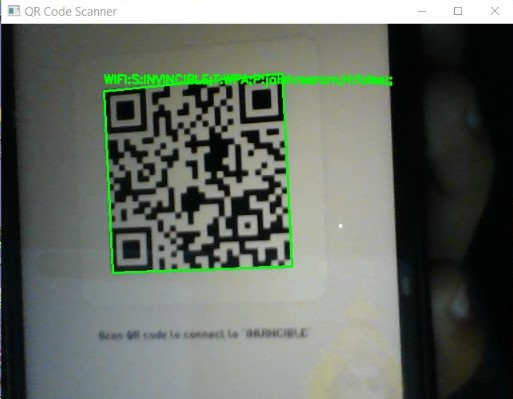